In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import plotly as pl
import plotly.express as px    
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
import phik
from phik.report import plot_correlation_matrix
from phik import report
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, shapiro
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('UberDataset.csv')
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [4]:
df.duplicated().sum()

1

In [5]:
df.drop_duplicates(keep='first', inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1154 non-null   object 
 2   CATEGORY    1154 non-null   object 
 3   START       1154 non-null   object 
 4   STOP        1154 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     652 non-null    object 
dtypes: float64(1), object(6)
memory usage: 72.2+ KB


In [7]:
df.isna().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [8]:
df['PURPOSE'] = df['PURPOSE'].fillna(value='UNKNOWN')

In [9]:
df.dropna(inplace=True)

In [10]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], dayfirst=False,format='mixed')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], dayfirst=False, format='mixed')

In [11]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,UNKNOWN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site


In [12]:


# create new feature representing the hour of the day
df['TIME_DAY'] = df['START_DATE'].apply(lambda i : i.hour)
df['TIME_OF_DAY'] = df['START_DATE'].apply(lambda i : i.hour)
df['TIME_OF_DAY'] = pd.cut(x = df['TIME_OF_DAY'], bins = [0, 6, 11, 17, 21, 24],
                             labels = ['Night', 'Morning','Afternoon','Evening','Night'], ordered = False)

#create new feature representing month of the ride
df['MONTH_OF_RIDE'] = df['START_DATE'].apply(lambda i : i.month)
month_label = {1.0: 'January', 2.0: 'February', 3.0: 'March', 4.0: 'April', 5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'August', 9.0: 'September', 10.0: 'October', 11.0: 'November', 12.0: 'December'}
df['MONTH_OF_RIDE'] = df['MONTH_OF_RIDE'].map(month_label)

#create new feature representing day (week) of the ride
df['DAY_OF_RIDE'] = df['START_DATE'].apply(lambda i : i.weekday())
day_label = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['DAY_OF_RIDE'] = df['DAY_OF_RIDE'].map(day_label).astype('category')

# duration of the ride (in minutes)
df['DURATION_OF_RIDE'] = (df['END_DATE'] - df['START_DATE']).astype('timedelta64[s]')
df['DURATION_OF_RIDE'] = (df['DURATION_OF_RIDE'] / pd.Timedelta(minutes=1))

df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_DAY,TIME_OF_DAY,MONTH_OF_RIDE,DAY_OF_RIDE,DURATION_OF_RIDE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Evening,January,Friday,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,UNKNOWN,1,Night,January,Saturday,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Evening,January,Saturday,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Afternoon,January,Tuesday,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,Afternoon,January,Wednesday,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,1,Night,December,Saturday,7.0
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,13,Afternoon,December,Saturday,18.0
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,15,Afternoon,December,Saturday,35.0
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,21,Evening,December,Saturday,18.0


In [13]:
df.isna().sum()

START_DATE           0
END_DATE             0
CATEGORY             0
START                0
STOP                 0
MILES                0
PURPOSE              0
TIME_DAY             0
TIME_OF_DAY         19
MONTH_OF_RIDE        0
DAY_OF_RIDE          0
DURATION_OF_RIDE     0
dtype: int64

In [14]:
df[df['TIME_OF_DAY'].isna()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_DAY,TIME_OF_DAY,MONTH_OF_RIDE,DAY_OF_RIDE,DURATION_OF_RIDE
27,2016-01-15 00:41:00,2016-01-15 01:01:00,Business,Morrisville,Cary,8.0,Errand/Supplies,0,NaN,January,Friday,20.0
103,2016-02-14 00:50:00,2016-02-14 01:00:00,Personal,Jackson Heights,East Elmhurst,1.8,UNKNOWN,0,NaN,February,Sunday,10.0
231,2016-03-17 00:33:00,2016-03-17 00:44:00,Personal,Downtown,The Drag,1.7,UNKNOWN,0,NaN,March,Thursday,11.0
274,2016-03-27 00:31:00,2016-03-27 00:40:00,Business,Lake Reams,Lake Reams,2.1,Errand/Supplies,0,NaN,March,Sunday,9.0
301,2016-04-06 00:19:00,2016-04-06 00:39:00,Business,Wayne Ridge,Whitebridge,8.0,Meal/Entertain,0,NaN,April,Wednesday,20.0
386,2016-05-28 00:15:00,2016-05-28 00:21:00,Business,Kilarney Woods,Whitebridge,4.7,Errand/Supplies,0,NaN,May,Saturday,6.0
454,2016-06-18 00:29:00,2016-06-18 00:51:00,Business,Morrisville,Cary,8.7,UNKNOWN,0,NaN,June,Saturday,22.0
489,2016-06-28 00:48:00,2016-06-28 01:05:00,Business,Morrisville,Cary,8.2,Customer Visit,0,NaN,June,Tuesday,17.0
500,2016-07-01 00:00:00,2016-07-01 00:25:00,Business,Durham,Cary,9.9,Meeting,0,NaN,July,Friday,25.0
507,2016-07-03 00:28:00,2016-07-03 00:38:00,Business,Cary,Morrisville,3.1,Errand/Supplies,0,NaN,July,Sunday,10.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1154 entries, 0 to 1154
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   START_DATE        1154 non-null   datetime64[ns]
 1   END_DATE          1154 non-null   datetime64[ns]
 2   CATEGORY          1154 non-null   object        
 3   START             1154 non-null   object        
 4   STOP              1154 non-null   object        
 5   MILES             1154 non-null   float64       
 6   PURPOSE           1154 non-null   object        
 7   TIME_DAY          1154 non-null   int64         
 8   TIME_OF_DAY       1135 non-null   category      
 9   MONTH_OF_RIDE     1154 non-null   object        
 10  DAY_OF_RIDE       1154 non-null   category      
 11  DURATION_OF_RIDE  1154 non-null   float64       
dtypes: category(2), datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 102.0+ KB


In [16]:
df['TIME_OF_DAY'] = df['TIME_OF_DAY'].fillna(value='Night')

In [17]:
pd.DataFrame({
    'Column': df.columns.values,
    'Data_type': df.dtypes.values,
    'Null': df.isna().mean().values * 100,
    'Negative': [True if df[col].dtype == int or df[col].dtype == float and (df[col] < 0).any() else False for col in df.columns],
    'N_unique': df.nunique().values,
    'Unique_sample': [df[col].unique() for col in df.columns]
})

,Column,Data_type,Null,Negative,N_unique,Unique_sample
0,START_DATE,datetime64[ns],0.0,False,1154,"[2016-01-01 21:11:00, 2016-01-02 01:25:00, 201..."
1,END_DATE,datetime64[ns],0.0,False,1154,"[2016-01-01 21:17:00, 2016-01-02 01:37:00, 201..."
2,CATEGORY,object,0.0,False,2,"[Business, Personal]"
3,START,object,0.0,False,177,"[Fort Pierce, West Palm Beach, Cary, Jamaica, ..."
4,STOP,object,0.0,False,188,"[Fort Pierce, West Palm Beach, Palm Beach, Car..."
5,MILES,float64,0.0,False,256,"[5.1, 5.0, 4.8, 4.7, 63.7, 4.3, 7.1, 0.8, 8.3,..."
6,PURPOSE,object,0.0,False,11,"[Meal/Entertain, UNKNOWN, Errand/Supplies, Mee..."
7,TIME_DAY,int64,0.0,False,23,"[21, 1, 20, 17, 14, 13, 8, 12, 15, 18, 19, 11,..."
8,TIME_OF_DAY,category,0.0,False,4,"['Evening', 'Night', 'Afternoon', 'Morning'] C..."
9,MONTH_OF_RIDE,object,0.0,False,12,"[January, February, March, April, May, June, J..."


In [18]:
display(df.describe(include='object'),df.describe())

,CATEGORY,START,STOP,PURPOSE,MONTH_OF_RIDE
count,1154,1154,1154,1154,1154
unique,2,177,188,11,12
top,Business,Cary,Cary,UNKNOWN,December
freq,1077,201,202,502,146


,START_DATE,END_DATE,MILES,TIME_DAY,DURATION_OF_RIDE
count,1154,1154,1154.000000,1154.000000,1154.000000
mean,2016-07-17 00:07:01.611784960,2016-07-17 00:30:16.117850880,10.567418,14.688908,23.241768
min,2016-01-01 21:11:00,2016-01-01 21:17:00,0.500000,0.000000,0.000000
25%,2016-03-31 20:23:30,2016-03-31 20:52:00,2.900000,12.000000,10.000000
50%,2016-07-21 17:29:30,2016-07-21 17:37:00,6.000000,15.000000,16.000000
75%,2016-10-27 21:16:15,2016-10-27 21:34:30,10.400000,18.000000,27.750000
max,2016-12-31 22:08:00,2016-12-31 23:51:00,310.300000,23.000000,336.000000
std,NaN,NaN,21.588452,4.570667,27.330072


In [19]:
numerical_col = [var for var in df.columns if ((df[var].dtypes == 'float64')|(df[var].dtypes == 'int64'))]
numerical_col

['MILES', 'TIME_DAY', 'DURATION_OF_RIDE']

In [20]:
def calculate_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outlier_df = []

for column in numerical_col:
    outlier_result, lower_bound, upper_bound = calculate_outliers(df, column)
    total_outlier = len(outlier_result)
    outlier_percentage = round(total_outlier / len(df[column]) * 100, 2)
    outlier_df.append([column, total_outlier, outlier_percentage, lower_bound, upper_bound])

outlier_df = pd.DataFrame(outlier_df, columns=["Column", "Total Outliers", "Percentage (%)", "Lower Bound", "Upper Bound"])
outlier_df

,Column,Total Outliers,Percentage (%),Lower Bound,Upper Bound
0,MILES,77,6.67,-8.350,21.650
1,TIME_DAY,26,2.25,3.000,27.000
2,DURATION_OF_RIDE,62,5.37,-16.625,54.375


In [21]:
# Stats numerical data distribution

dist = []

for i in range(len(numerical_col)):
    feature_name = numerical_col[i]
    stat, p_value = shapiro(df['MILES'].dropna())
    
    if p_value > 0.05:
        distribution = "Normally Distributed"
    else:
        distribution = "Not Normally Distributed"
    
    dist.append([feature_name, stat, p_value, distribution])

dist_df = pd.DataFrame(dist, columns=['Feature', "Shapiro", 'P-value', 'Data Distribution'])
dist_df

,Feature,Shapiro,P-value,Data Distribution
0,MILES,0.348216,0.0,Not Normally Distributed
1,TIME_DAY,0.348216,0.0,Not Normally Distributed
2,DURATION_OF_RIDE,0.348216,0.0,Not Normally Distributed


In [22]:
numerical_col

['MILES', 'TIME_DAY', 'DURATION_OF_RIDE']

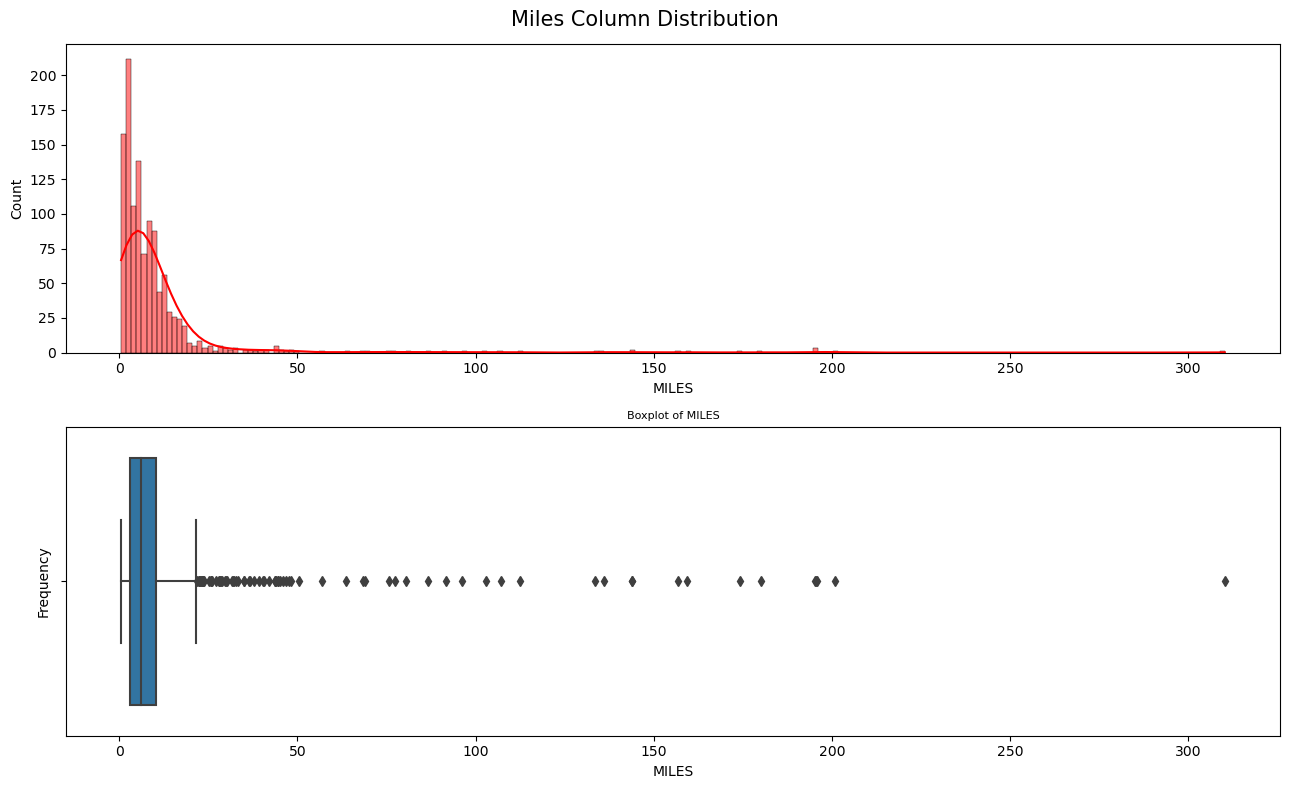

In [23]:
fig, axes = plt.subplots(2,1, figsize=(13, 8))

# Histogram
sns.histplot(df['MILES'], kde=True, color='red', ax=axes[0])
plt.title(f'Histogram of MILES', size=8)
plt.xlabel('MILES')
plt.ylabel('Frequency')

# Boxplot
sns.boxplot(x=df['MILES'], ax=axes[1])
plt.title(f'Boxplot of MILES', size=8)
plt.xlabel('MILES')

plt.suptitle('Miles Column Distribution', size=15)
plt.tight_layout()
plt.show()

In [24]:
df[df['MILES']>20]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_DAY,TIME_OF_DAY,MONTH_OF_RIDE,DAY_OF_RIDE,DURATION_OF_RIDE
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,Afternoon,January,Wednesday,67.0
25,2016-01-14 16:29:00,2016-01-14 17:05:00,Business,Houston,Houston,21.9,Customer Visit,16,Afternoon,January,Thursday,36.0
36,2016-01-20 13:25:00,2016-01-20 14:19:00,Business,Raleigh,Cary,40.2,Customer Visit,13,Afternoon,January,Wednesday,54.0
62,2016-02-01 12:10:00,2016-02-01 12:43:00,Business,Chapel Hill,Cary,23.3,Customer Visit,12,Afternoon,February,Monday,33.0
108,2016-02-16 03:21:00,2016-02-16 04:13:00,Business,Katunayaka,Unknown Location,43.7,Customer Visit,3,Night,February,Tuesday,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...
979,2016-11-20 10:27:00,2016-11-20 11:32:00,Business,Cary,Cary,39.2,Between Offices,10,Morning,November,Sunday,65.0
1088,2016-12-21 20:56:00,2016-12-21 23:42:00,Business,Rawalpindi,Unknown Location,103.0,Meeting,20,Evening,December,Wednesday,166.0
1089,2016-12-22 15:40:00,2016-12-22 16:38:00,Business,Unknown Location,Unknown Location,32.3,Meeting,15,Afternoon,December,Thursday,58.0
1092,2016-12-22 17:56:00,2016-12-22 18:29:00,Business,Unknown Location,Unknown Location,23.2,Meeting,17,Afternoon,December,Thursday,33.0


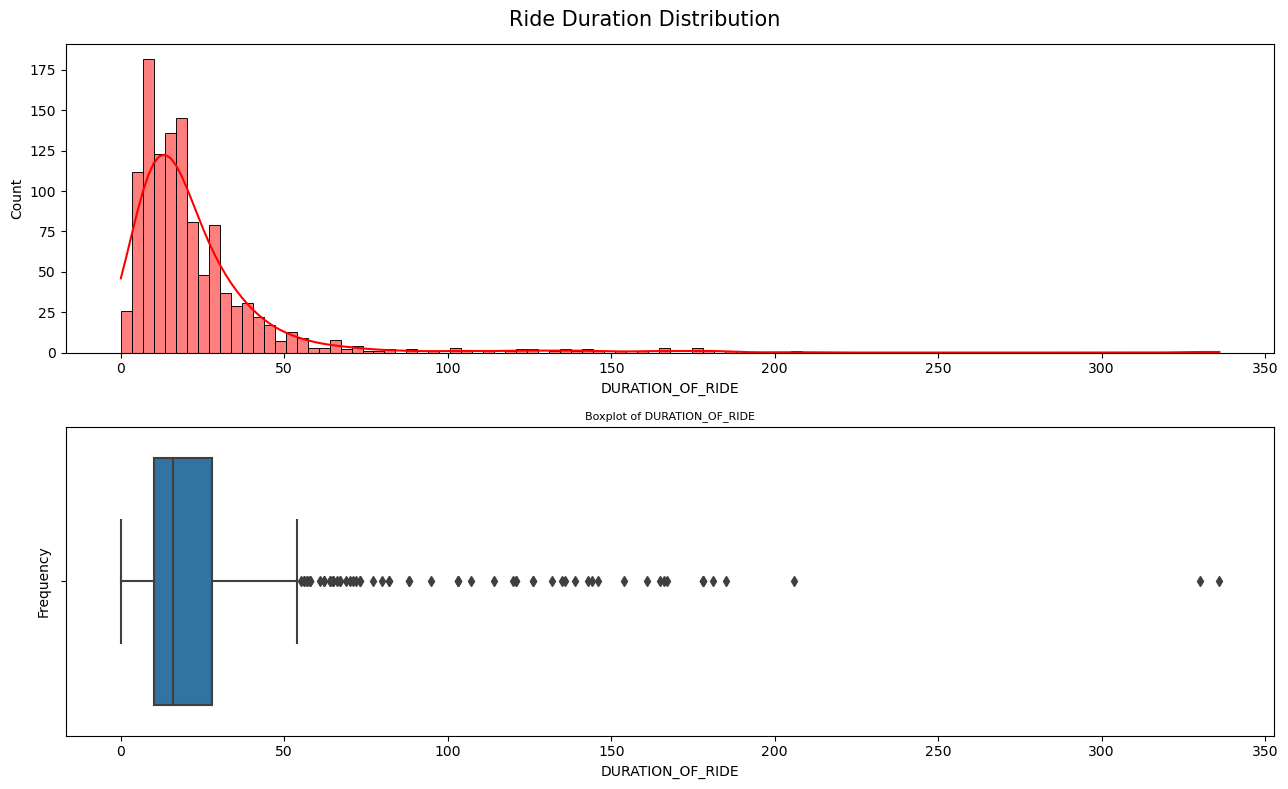

In [25]:
fig, axes = plt.subplots(2,1, figsize=(13, 8))

# Histogram
sns.histplot(df['DURATION_OF_RIDE'], kde=True, color='red', ax=axes[0])
plt.title(f'Histogram of DURATION_OF_RIDE', size=8)
plt.xlabel('DURATION_OF_RIDE')
plt.ylabel('Frequency')

# Boxplot
sns.boxplot(x=df['DURATION_OF_RIDE'], ax=axes[1])
plt.title(f'Boxplot of DURATION_OF_RIDE', size=8)
plt.xlabel('DURATION_OF_RIDE')

plt.suptitle('Ride Duration Distribution', size=15)
plt.tight_layout()
plt.show()

In [26]:
categorical_col = [var for var in df.columns if df[var].dtypes == 'object']


interval columns not set, guessing: ['MILES', 'TIME_DAY', 'DURATION_OF_RIDE']


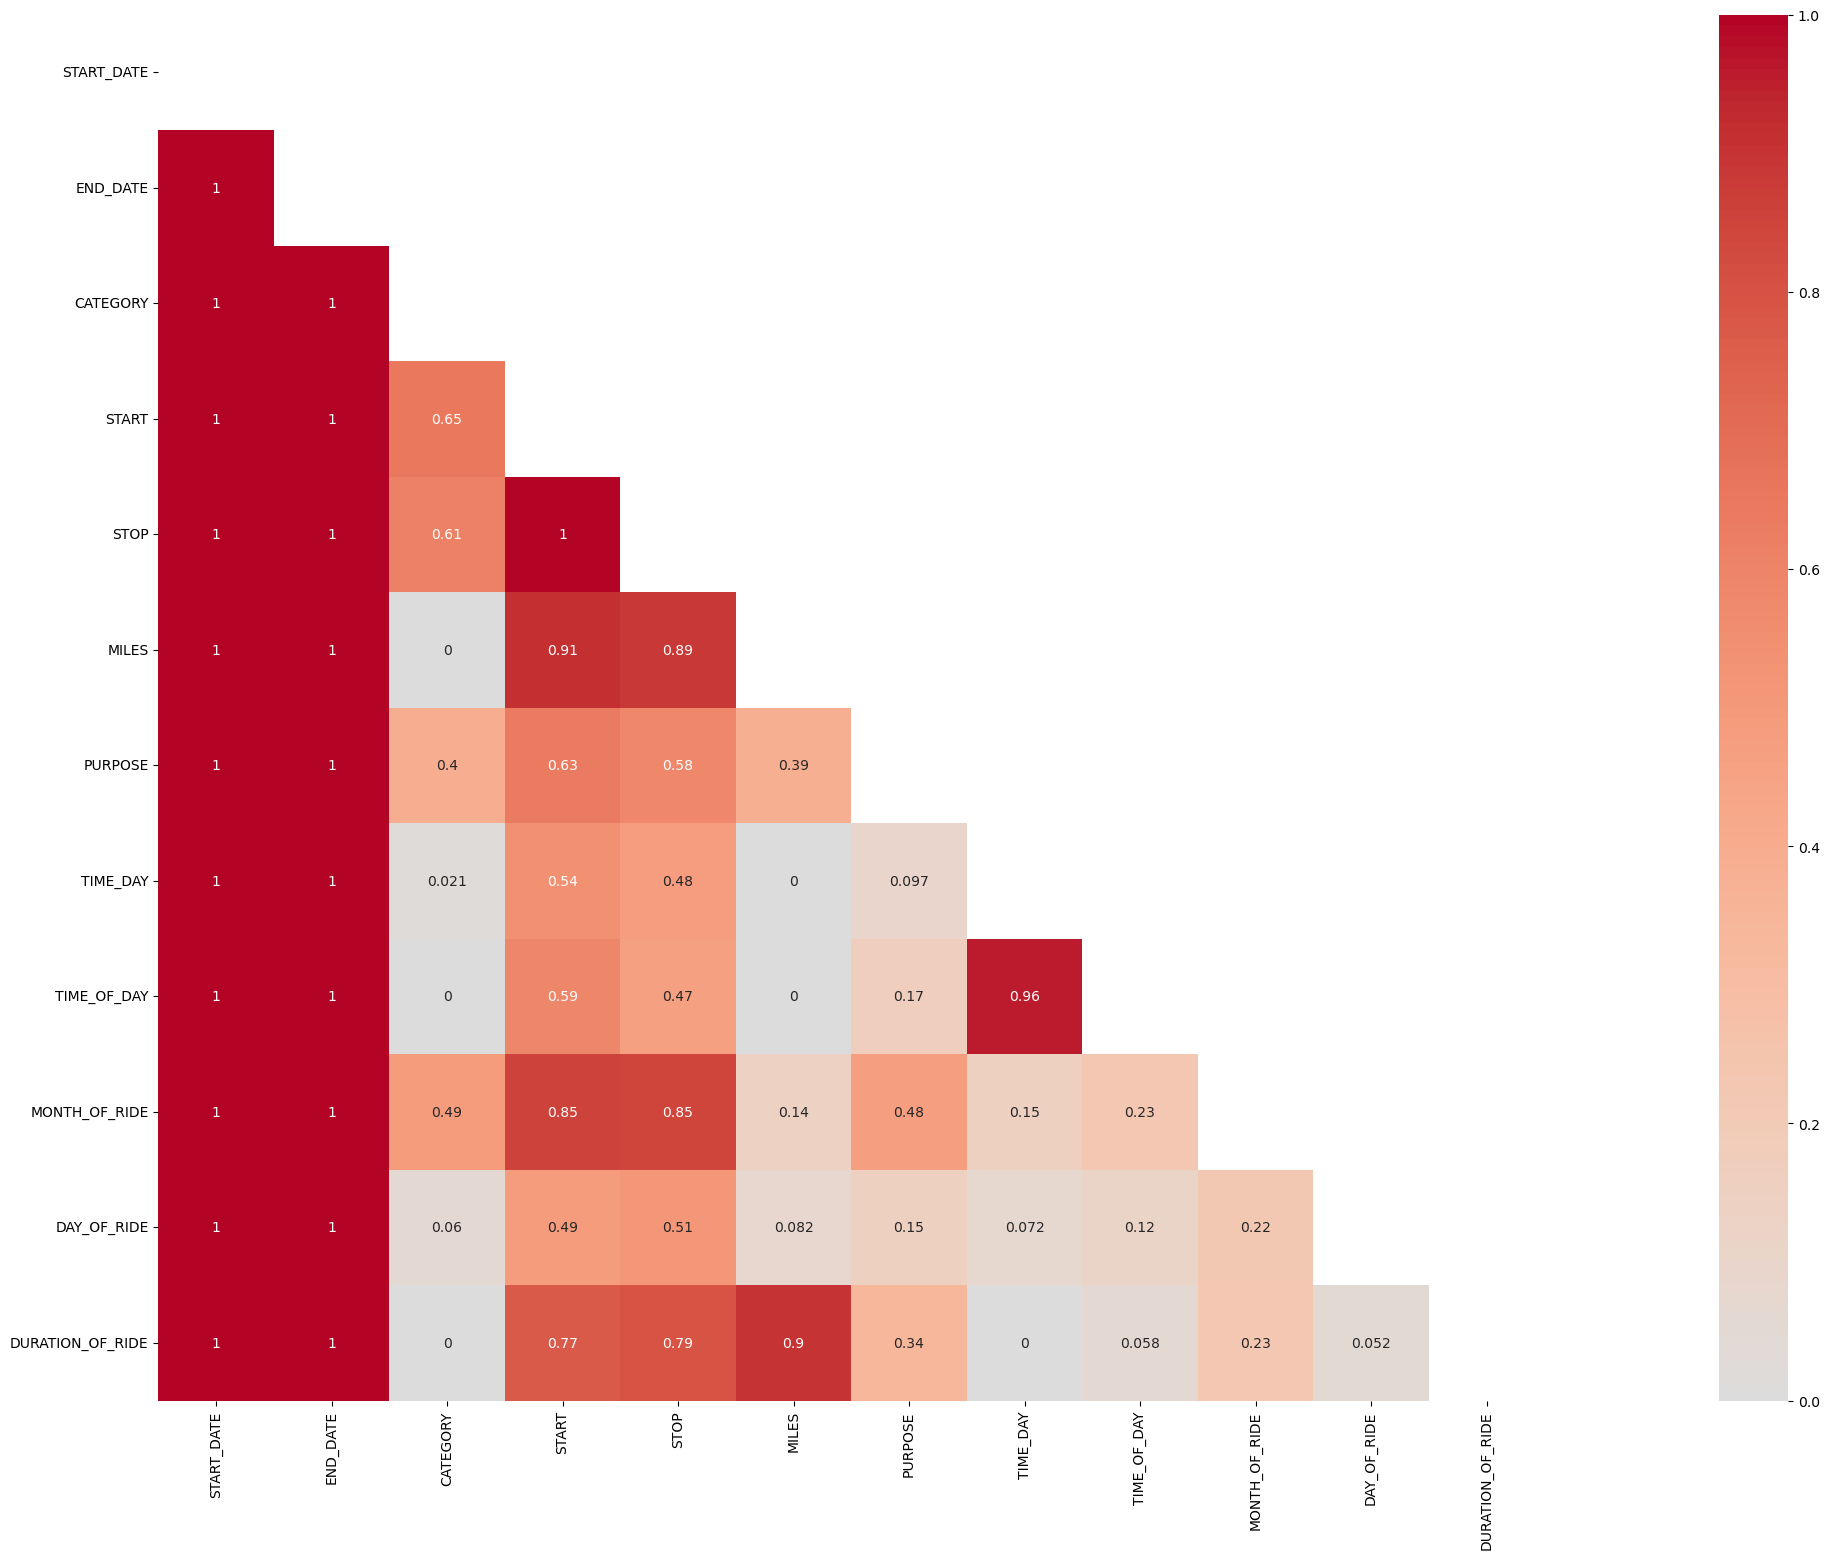

In [27]:
plt.figure(figsize=(45,18))

corrmap = df[['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE', 'TIME_DAY', 'TIME_OF_DAY', 'MONTH_OF_RIDE', 'DAY_OF_RIDE',
       'DURATION_OF_RIDE']]

phik_overview = corrmap.phik_matrix()
matrix = np.triu(np.ones_like(phik_overview, dtype=bool))

sns.heatmap(phik_overview, annot=True, cmap='coolwarm', center=0, mask = matrix, square='True')
plt.show()

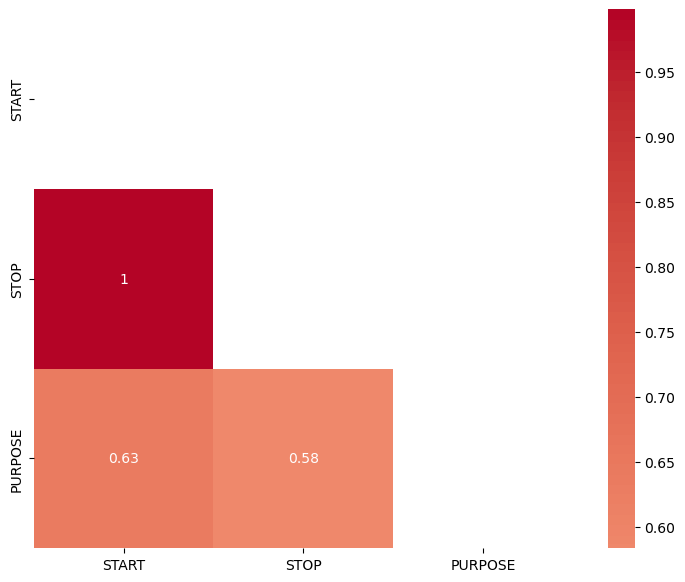

In [28]:
plt.figure(figsize=(9,7))

corrmap = df[['START', 'STOP', 'PURPOSE']]

phik_overview = corrmap.phik_matrix()
matrix = np.triu(np.ones_like(phik_overview, dtype=bool))

sns.heatmap(phik_overview, annot=True, cmap='coolwarm', center=0, mask = matrix, square='True')
plt.show()

In [29]:
df['PURPOSE'].nunique()

11

In [30]:
fig_bar = go.Figure(go.Bar(
    x=df['PURPOSE'].unique(), 
    y=df['PURPOSE'].value_counts(sort=False), 
    name='Count'))
colors = ['darkblue', 'darkgoldenrod', 'darkred', 'salmon', 'darkorchid','darkgreen']

fig_bar.update_layout(title='Trips Purposes')

fig_bar.show()

In [32]:
filter = ['Meal/Entertain', 'Errand/Supplies', 'Meeting', 'Customer Visit', 'Temporary Site']

filtered = df[df['PURPOSE'].isin(filter)]

fig = go.Figure()

fig.add_trace(go.Bar(
    x=filtered['PURPOSE'].unique(), 
    y=filtered['PURPOSE'].value_counts(), 
    marker_color=['gold', 'lightgreen', 'skyblue', 'orange', 'red'],
    name='Bar')
    )

fig.update_layout(title='Top 5 Trips Purposes')

fig.show()

In [33]:
filtered['PURPOSE'].value_counts('')

PURPOSE
Meeting            186
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Name: count, dtype: int64

In [35]:
fig_pie = go.Figure(go.Pie(
    labels=df['CATEGORY'].unique(), 
    values=df['CATEGORY'].value_counts(), 
    marker=dict(colors=['gold','red']),
    name='Percentage',
    hoverinfo=['label+value'],
    textinfo='label+percent',
    textfont_size=15,
    ))

fig_pie.update_traces(hole=0.55)
fig_pie.update_layout(
    annotations=[dict(text="Total Trips", x=0.17+0.33, y=0.65, font_size=15, showarrow=False),
                 dict(text=str(df['CATEGORY'].count()), x=0.190+0.31, y=0.55, font_size=15, showarrow=False),
                 dict(text="Personal", x=0.450, y=0.370, font_size=10, showarrow=False),
                 dict(text="Business", x=0.530, y=0.370, font_size=10, showarrow=False),
                ],
    title = 'Trips Category')
fig_pie.add_shape(type="rect",
    x0=0.1+0.35,
    y0=0.40, 
    x1=0.2+0.27, 
    y1=0.45,
    line=dict(
        color="Black",
        width=2,
    ),
    fillcolor="Red",
)

fig_pie.add_shape(type="rect",
    x0=0.18+0.06+0.27, 
    y0=0.40, 
    x1=0.2+0.06+0.27, 
    y1=0.45,
    line=dict(
        color="Black",
        width=2,
    ),
    fillcolor="Gold",
)


fig_pie.show()

In [ ]:
df[df['CATEGORY']=='Personal']['PURPOSE'].value_counts()

PURPOSE
UNKNOWN        71
Moving          4
Charity ($)     1
Commute         1
Name: count, dtype: int64

In [ ]:
df['MONTH_OF_RIDE'].value_counts(sort=False)

MONTH_OF_RIDE
January       61
February     115
March        113
April         54
May           49
June         107
July         112
August       133
September     36
October      106
November     122
December     146
Name: count, dtype: int64

In [67]:
month_ride = pd.crosstab(index=df['MONTH_OF_RIDE'], columns=df['PURPOSE'], values=df['PURPOSE'], aggfunc='count')

month_ride = month_ride.fillna(0)

month_ride = month_ride.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August','September','October','November','December'])

month_ride


PURPOSE,Airport/Travel,Between Offices,Charity ($),Commute,Customer Visit,Errand/Supplies,Meal/Entertain,Meeting,Moving,Temporary Site,UNKNOWN
MONTH_OF_RIDE,,,,,,,,,,,
January,0.0,0.0,0.0,0.0,11.0,13.0,14.0,18.0,0.0,3.0,2.0
February,0.0,1.0,0.0,0.0,9.0,14.0,17.0,25.0,0.0,16.0,33.0
March,0.0,2.0,0.0,0.0,14.0,7.0,31.0,15.0,0.0,2.0,42.0
April,0.0,3.0,0.0,0.0,9.0,7.0,11.0,17.0,0.0,3.0,4.0
May,0.0,2.0,0.0,0.0,9.0,11.0,15.0,9.0,0.0,0.0,3.0
June,0.0,4.0,0.0,0.0,6.0,18.0,18.0,25.0,0.0,1.0,35.0
July,0.0,0.0,1.0,1.0,2.0,8.0,10.0,18.0,4.0,2.0,66.0
August,1.0,0.0,0.0,0.0,3.0,0.0,1.0,2.0,0.0,5.0,121.0
September,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0


In [64]:
fig = go.Figure()

colors = ['navy', 'darkred', 'darkblue', 'black', 'darkgrey','darkseagreen','gold','lightcyan','lightblue','moccasin','black']

for i, col in enumerate(month_ride.columns):  
    fig.add_trace(go.Bar(y=month_ride.index, x=month_ride[col], name=col, orientation='h', marker_color=colors[i]))

# Update layout
fig.update_layout(barmode='stack', title='Trip Purposes per Month', xaxis_title='Trips', yaxis_title='Month')

# Tampilkan plot
fig.show()

In [39]:
fig = go.Figure()

x=df['MONTH_OF_RIDE'].unique()
y=df['MONTH_OF_RIDE'].value_counts(sort=False)

colors = ['blue' if y[i] <= y[i + 1] else 'red' for i in range(len(y) - 1)]

for i in range(len(x) - 1):
    fig.add_trace(go.Scatter(x=x[i:i+2], y=y[i:i+2], mode='lines', line=dict(color=colors[i], width=3), showlegend=False))



fig.update_layout(title='Trend of Trips per Month',
                  xaxis_title='Month',
                  yaxis_title='Total Trips')


fig.show()

march - april spring break


In [40]:
trip_day = df['DAY_OF_RIDE'].value_counts().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

trip_day

DAY_OF_RIDE
Monday       174
Tuesday      175
Wednesday    147
Thursday     154
Friday       206
Saturday     150
Sunday       148
Name: count, dtype: int64

In [41]:
fig = make_subplots(
    rows=1,
    cols=1,
    column_titles= ['Trips per Day'],
    y_title= 'Number of Trips'
)

cmp = go.Bar(
    x=trip_day.index,
    y=trip_day,
    name='count'
)

fig.add_trace(cmp, 1,1)

fig

In [42]:
purpose_time = pd.crosstab(index=df['DAY_OF_RIDE'], columns=df['PURPOSE'], values=df['PURPOSE'], aggfunc='count')
purpose_time = purpose_time.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

purpose_time.drop(columns='UNKNOWN', inplace=True)

purpose_time


PURPOSE,Airport/Travel,Between Offices,Charity ($),Commute,Customer Visit,Errand/Supplies,Meal/Entertain,Meeting,Moving,Temporary Site
DAY_OF_RIDE,,,,,,,,,,
Monday,0,4,0,0,21,15,26,12,4,5
Tuesday,0,2,0,0,12,23,25,23,0,8
Wednesday,0,4,0,0,16,16,22,22,0,5
Thursday,1,1,0,0,13,18,22,23,0,14
Friday,0,1,0,0,17,19,21,59,0,8
Saturday,1,3,0,0,11,20,22,22,0,4
Sunday,1,3,1,1,11,17,22,25,0,6


In [66]:
fig = go.Figure()

for i, col in enumerate(purpose_time.columns):  
    fig.add_trace(go.Bar(y=purpose_time.index, x=purpose_time[col], name=col, orientation='h'))

# Update layout
fig.update_layout(barmode='stack', title='Trip Purposes per Days', xaxis_title='Trips', yaxis_title='Days')

# Tampilkan plot
fig.show()

In [44]:
time_day = pd.crosstab(index=df['DAY_OF_RIDE'], columns=df['TIME_OF_DAY'], values=df['TIME_OF_DAY'], aggfunc='count')

time_day = time_day.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
 
time_day = time_day[['Morning','Afternoon','Evening','Night']]

pct_day = time_day.copy()

pct_day['Total/Day'] = pct_day[['Morning','Afternoon','Evening','Night']].apply(sum, axis=1)

for column in pct_day.columns:
    pct_day[column] = round((pct_day[column] / pct_day['Total/Day']) * 100)

pct_day.drop(columns='Total/Day', inplace=True)

time_day

TIME_OF_DAY,Morning,Afternoon,Evening,Night
DAY_OF_RIDE,,,,
Monday,38,82,45,9
Tuesday,40,86,35,14
Wednesday,25,82,30,10
Thursday,22,72,49,11
Friday,60,89,43,14
Saturday,27,72,32,19
Sunday,24,58,50,16


In [45]:
fig = go.Figure()

colors = ['gold', 'darkred', 'darkblue', 'black']

for i, col in enumerate(time_day.columns):  
    fig.add_trace(go.Bar(y=time_day.index, x=time_day[col], name=col, orientation='h', marker_color=colors[i], 
                          legendgroup=col))

# Update layout
fig.update_layout(barmode='stack', title='Total Trips on Days', xaxis_title='Trips', yaxis_title='Days')

# Tampilkan plot
fig.show()

In [ ]:
pct_day['Afternoon'].mean()

47.0

In [ ]:
pct_day

TIME_OF_DAY,Morning,Afternoon,Evening,Night
DAY_OF_RIDE,,,,
Monday,22.0,47.0,26.0,5.0
Tuesday,23.0,49.0,20.0,8.0
Wednesday,17.0,56.0,20.0,7.0
Thursday,14.0,47.0,32.0,7.0
Friday,29.0,43.0,21.0,7.0
Saturday,18.0,48.0,21.0,13.0
Sunday,16.0,39.0,34.0,11.0


In [46]:
top_labels = ['Morning', 'Afternoon', 'Evening', 'Night']
              
colors = ['green', 'darkred', 'darkblue', 'black']

x_data = pct_day.values

y_data = pct_day.index

fig = go.Figure()

for i in range(0, len(x_data[0])):
    for xd, yd in zip(x_data, y_data):
        fig.add_trace(go.Bar(
            x=[xd[i]], y=[yd],
            orientation='h',
            marker=dict(
                color=colors[i],
                line=dict(color='rgb(248, 248, 249)', width=1)
            )
        ))
        
fig.update_layout(
    xaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
        domain=[0.15, 1]
    ),
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
    ),
    barmode='stack',
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
    margin=dict(l=120, r=10, t=140, b=80),
    showlegend=False,
)

fig.update_layout(
    title={'text': "Percentage of Trips per Time on Day"}
)

annotations = []
for yd, xd in zip(y_data, x_data):
    
    
    annotations.append(dict(xref='paper', yref='y',
                            x=0.14, y=yd,
                            xanchor='right',
                            text=str(yd),
                            font=dict(family='Arial', size=14,
                                      color='rgb(67, 67, 67)'),
                            showarrow=False, align='right'))

    
    annotations.append(dict(xref='x', yref='y',
                            x=xd[0] / 2, y=yd,
                            text=str(xd[0]) + '%',
                            font=dict(family='Arial', size=14,
                                      color='rgb(248, 248, 255)'),
                            showarrow=False))

    #
    if yd == y_data[-1]:
        annotations.append(dict(xref='x', yref='paper',
                                x=xd[0] / 2, y=1.1,
                                text=top_labels[0],
                                font=dict(family='Arial', size=14,
                                          color='rgb(67, 67, 67)'),
                                showarrow=False))

    space = xd[0]
    for i in range(1, len(xd)):
            
            annotations.append(dict(xref='x', yref='y',
                                    x=space + (xd[i]/2), y=yd,
                                    text=str(xd[i]) + '%',
                                    font=dict(family='Arial', size=14,
                                              color='rgb(248, 248, 255)'),
                                    showarrow=False))

            
            if yd == y_data[-1]:
                annotations.append(dict(xref='x', yref='paper',
                                        x=space + (xd[i]/2), y=1.1,
                                        text=top_labels[i],
                                        font=dict(family='Arial', size=14,
                                                  color='rgb(67, 67, 67)'),
                                        showarrow=False))
            space += xd[i]

fig.update_layout(annotations=annotations)

fig.show()

In [ ]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE', 'TIME_DAY', 'TIME_OF_DAY', 'MONTH_OF_RIDE', 'DAY_OF_RIDE',
       'DURATION_OF_RIDE'],
      dtype='object')

In [ ]:
df['DURATION_OF_RIDE'].value_counts()

DURATION_OF_RIDE
6.0      51
15.0     50
10.0     50
11.0     48
7.0      46
         ..
206.0     1
71.0      1
72.0      1
143.0     1
70.0      1
Name: count, Length: 99, dtype: int64

In [ ]:
df.sort_values(by='DURATION_OF_RIDE', ascending=False).head(15)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_DAY,TIME_OF_DAY,MONTH_OF_RIDE,DAY_OF_RIDE,DURATION_OF_RIDE
776,2016-09-27 21:01:00,2016-09-28 02:37:00,Business,Unknown Location,Unknown Location,195.6,UNKNOWN,21,Evening,September,Tuesday,336.0
269,2016-03-25 16:52:00,2016-03-25 22:22:00,Business,Latta,Jacksonville,310.3,Customer Visit,16,Afternoon,March,Friday,330.0
546,2016-07-14 16:39:00,2016-07-14 20:05:00,Business,Morrisville,Banner Elk,195.3,UNKNOWN,16,Afternoon,July,Thursday,206.0
559,2016-07-17 12:20:00,2016-07-17 15:25:00,Personal,Boone,Cary,180.2,Commute,12,Afternoon,July,Sunday,185.0
881,2016-10-30 15:22:00,2016-10-30 18:23:00,Business,Asheville,Mebane,195.9,UNKNOWN,15,Afternoon,October,Sunday,181.0
268,2016-03-25 13:24:00,2016-03-25 16:22:00,Business,Cary,Latta,144.0,Customer Visit,13,Afternoon,March,Friday,178.0
727,2016-08-27 16:15:00,2016-08-27 19:13:00,Business,Unknown Location,Unknown Location,156.9,UNKNOWN,16,Afternoon,August,Saturday,178.0
297,2016-04-02 19:38:00,2016-04-02 22:36:00,Business,Jacksonville,Ridgeland,174.2,Customer Visit,19,Evening,April,Saturday,178.0
787,2016-10-06 08:49:00,2016-10-06 11:36:00,Business,Unknown Location,R?walpindi,17.9,UNKNOWN,8,Morning,October,Thursday,167.0
1088,2016-12-21 20:56:00,2016-12-21 23:42:00,Business,Rawalpindi,Unknown Location,103.0,Meeting,20,Evening,December,Wednesday,166.0


In [ ]:
df['START'].nunique()

177

In [ ]:
df['STOP'].nunique()

188

In [ ]:
df['START'].value_counts().head(10)

START
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Lahore               36
Durham               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Name: count, dtype: int64

In [ ]:
df['STOP'].value_counts().head(10)

STOP
Cary                202
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Name: count, dtype: int64

In [47]:
most_trips = df.groupby(['START', 'STOP']).size().reset_index(name='count').sort_values('count', ascending=False).head(6)

most_trips = most_trips.drop(most_trips.index[0])

most_trips['Trips'] = most_trips['START'] + '-' + most_trips['STOP']

most_trips.drop(columns=['START','STOP'])

most_trips = most_trips.sort_values('count')

most_trips

,START,STOP,count,Trips
86,Durham,Cary,31,Durham-Cary
42,Cary,Durham,36,Cary-Durham
40,Cary,Cary,53,Cary-Cary
46,Cary,Morrisville,67,Cary-Morrisville
205,Morrisville,Cary,75,Morrisville-Cary


In [48]:
fig_bar = go.Figure(data=[go.Bar(
    y=most_trips['Trips'],
    x=most_trips['count'].sort_values(),
    hovertemplate='Total Trips: %{x}, Route: %{y}',
    orientation='h',
    marker=dict(color=['lightgreen', 'orange', 'aqua', 'navy', 'gold'])
    )])

fig_bar.update_layout(title='Top 5 Trip Routes')

fig_bar.show()

In [ ]:
df.to_csv('ubercleaned.csv')